### Problem

In chess, a knight can move as indicated in the chess diagram below
1 step horizontal following by 2 steps vertical; or
2 steps vertical and 1 step horizontal

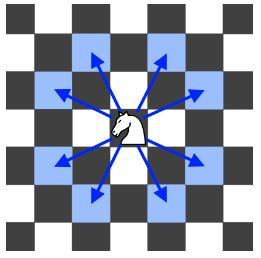


Using the below keypad, given any starting position, how many distinct numbers can you dial in this manner? Your output must be the total number of moves and not each move, i.e. if 10 moves are found to be possible, your output should be 10


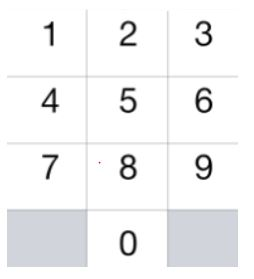


Each time it lands on a key (including the initial placement of the knight), it presses the number of that key, pressing N digits total.


This is a nice exercise, especially since I like playing chess with family and friends once in a while.

#### My first Observation
The indications "1 step horizontal following by 2 steps vertical; or 2 steps vertical and 1 step horizontal" are incorrect.
Practically, this is just one way of moving but done in different order with: 2 steps vertical and 1 step horizontal. The other moves are done with 1 step vertical and two steps horizontal in whatever order. 

We need this clarification to consider all valid knight moves

### Understanding the problem + assumptions

After reading "Using the below keypad, given any starting position, how many distinct numbers can you dial in this manner? Your output must be the total number of moves and not each move, i.e. if 10 moves are found to be possible, your output should be 10" 

----

I firstly understood that we have to find how many numbers we can press using the knight available moves and I was starting already to observe how can I press all buttons using the knight moves starting from 1,3,7,9,0. 

After realising that the result is 10 and is way too simple to be correct, I read carefully the last statement: "Each time it lands on a key (including the initial placement of the knight), it presses the number of that key, pressing N digits total." 

and "pressing N digits total" gave me the following understanding:

We have to create a coding solution that will calculate the total number of distinct numbers (or distinct sequences of digits) a knight can press on the given keypad, starting from any key.

### Important observation

The bolded statement: "Your output must be the total number of moves and not each move, i.e. if 10 moves are found to be possible, your output should be 10" 

is misguiding/misleading and wrong in my view (it contradicts the goal of finding distinct numbers). In the beginning, the exercise asks for number of distinct numbers we can dial in ("how many distinct numbers", which makes perfect sense given all the context and info (including N digits from the last statement where there is a hint for a variable in our calculation - N) BUT then it asks for total number of moves in the output which is not equivalent with number of distinct numbers. 


### Conclusion about exercise's requirement 

My assumption and understanding is that the output should be how many distinct numbers we can form using any starting position. Additionally, we have to consider N - as how many digits we want to press. Therefore, our goal is to determine how many distinct numbers can be formed by the knight's moves, taking into account the constraint of pressing exactly N digits or making exactly N moves. 

##### In other words, we are calculating the number of distinct numbers that can be formed using exactly N digits or by making exactly N moves from any starting position on the keypad."

##### Now that we have understood the problem, the context and the requirement to solve, I have created two coding solutions for calculating the number of distinct numbers that can be formed using N digits/using N moves from any starting position on the keypad. 

### First Solution: Recursive solution to the problem

In [1]:
# The layout of the keypad
keypad = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [-1, 0, -1]  # -1 represents the "*" and "#" keys where the knight can't move
]

# The possible moves for the knight on the keypad
knight_moves = [
    [-2, -1], [-2, 1],  # Two up and one left/right
    [-1, -2], [-1, 2],  # One up and two left/right
    [1, -2], [1, 2],    # One down and two left/right
    [2, -1], [2, 1]     # Two down and one left/right
]


# This function finds all the numbers that can be dialed from a given position
def find_numbers(row, col, N):
    # If we're only dialing one number, then the only "number" we can dial is the current key
    if N == 1:
        return {keypad[row][col]}

    # This set will store the numbers we can dial
    numbers = set()

    # For each possible move the knight can make...
    for dr, dc in knight_moves:
        # Calculate the new position on the keypad
        new_row, new_col = row + dr, col + dc

        # If the new position is within the keypad and isn't a '*' or '#' key...
        if 0 <= new_row < 4 and 0 <= new_col < 3 and keypad[new_row][new_col] != -1:
            # Recursively find the numbers we can dial from the new position
            next_numbers = find_numbers(new_row, new_col, N-1)

            # For each of those numbers...
            for num in next_numbers:
                # Append the current key to the front of the number and add it to our set
                numbers.add(keypad[row][col] * 10**(N-1) + num)

    # Return the set of numbers we can dial
    return numbers


# This function calculates the total number of distinct numbers that can be dialed
def total_numbers(N):
    # This will store the total number of numbers
    total = 0

    # For each key on the keypad...
    for row in range(4):
        for col in range(3):
            # If the key isn't a '*' or '#' key...
            if keypad[row][col] != -1:
                # Add the count of numbers we can dial from this key to the total
                total += len(find_numbers(row, col, N))

    # Return the total number of numbers
    return total

Let's calculate the solution for N = 10 which is the format of romanian phone numbers.

In [2]:
print(total_numbers(10))

14912


#### The first solution uses a recursive approach to enumerate all results, which can be very slow and memory-intensive for large inputs because it generates all possible phone numbers and keeps them in memory.

#### Let's look for another solution that is more efficient.

### Second Solution: Dynamic programming solution to the problem

In [3]:
def count_paths(graph, length, mod=10**9+7):
    # Create a list with 10 elements, all initialized to 1. This represents the number of ways to reach each digit if we can move only once (i.e., when n=1)
    this_row = [1] * 10
    # Iterate over the length of the number we want to form
    for row in range(1, length):
        # Save the current row as the previous row for the next iteration
        prev_row = this_row
        # Initialize the current row with zeros
        this_row = [0] * 10
        # Iterate over each digit and its possible next moves
        for prev, nexts in graph.items():
            # For each possible next move, add the number of ways to reach the previous digit to the number of ways to reach the current digit
            for next_ in nexts:
                this_row[next_] += prev_row[prev]
                # Apply the modulus operation to avoid integer overflow
                this_row[next_] %= mod
    # After all moves, return the total number of ways to form the number, applying the modulus operation
    return sum(this_row) % mod

# Define the possible moves for the knight from each digit
knight = {0: [4, 6], 1: [6, 8], 2: [7, 9], 3: [4, 8], 4: [3, 9, 0],
          6: [1, 7, 0], 7: [2, 6], 8: [1, 3], 9: [4, 2]}

Let's calculate the solution for N = 10 again using the second solution which is more efficient.

In [4]:
# Call the function with the knight moves and the desired length of the number
print(count_paths(knight, 10))

14912


#### The second solution uses dynamic programming, a technique that breaks the problem down into smaller subproblems and solves each subproblem only once, storing the results to avoid duplicate work. This makes it much faster and less memory-intensive for large inputs (this approach is much more efficient in terms of both time and memory usage).

#### Why second solution is better? (more details)

Explanation:

The best solution, second one, is using dynamic programming to calculate the number of unique phone numbers of a certain length that can be dialed, without actually generating all these numbers. 

We do this by storing the number of ways to reach each digit after each move, and using these stored values to calculate the number of ways to reach each digit after the next move. 

This avoids the need to generate all possible sequences of moves, which would be very time-consuming and memory-intensive.

In terms of time complexity, if n is the length of the phone number, and m is the maximum number of possible next digits for any digit, the time complexity of the dynamic programming approach is O(mn), which is much lower than the O(m^n) time complexity of the exhaustive enumeration approach.